In [10]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis


In [11]:
#configure faceanalysis
faceapp = FaceAnalysis('buffalo_sc')
faceapp.prepare(ctx_id=0, det_size=(640,640), det_thresh=0.5) #des_thresh should be >= 0.3


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\tuand/.insightface\models\buffalo_sc\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\tuand/.insightface\models\buffalo_sc\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


D:\Code\Attendance_System\attendance_system\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


In [12]:
import re

In [13]:
def clean_name(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.title()
    return text

In [14]:
personal_info = []
listdir = os.listdir(path='images')

for folder_name in listdir: 
    role, name = folder_name.split('-')
    name = clean_name(name)
    role = clean_name(role)
    # print('Role:', role, end=' ')
    # print('Name:', name)
    img_files = os.listdir(path=f'images/{folder_name}')
    for file in img_files:
        path = f'./images/{folder_name}/{file}'
        # print(path)
        img_arr = cv2.imread(path)

        result = faceapp.get(img_arr, max_num=1)

        if len(result)>0:
            res = result[0]
            embedding = res['embedding']
            personal_info.append([name,role,embedding])
            
        

In [15]:
dataframe = pd.DataFrame(personal_info, columns = ['Name', 'Role', 'Facial_Features'])
dataframe

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[-0.84097606, 1.6623002, -0.7457807, -2.138082..."
1,Angelina Jolie,Student,"[0.09012361, -0.4169106, -0.3765071, 0.4240121..."
2,Angelina Jolie,Student,"[0.8638969, 0.3295202, 0.05781907, -1.4538239,..."
3,Angelina Jolie,Student,"[1.6611184, 1.161086, -0.4107926, -2.6411536, ..."
4,Angelina Jolie,Student,"[0.8643123, 0.9437618, 0.42651647, -1.1836898,..."
5,Angelina Jolie,Student,"[0.41072458, 1.1821755, -0.99553794, -1.401419..."
6,Angelina Jolie,Student,"[0.42289662, 2.084678, 1.0648305, -2.2739336, ..."
7,Angelina Jolie,Student,"[0.39441866, 0.84412277, -0.6154817, -2.104782..."
8,Angelina Jolie,Student,"[1.093116, 1.1680485, -0.28963193, -2.0099525,..."
9,Angelina Jolie,Student,"[-0.6354259, 1.7897134, 0.59832555, -3.5500882..."


In [16]:
img_test = cv2.imread('test_images/test_img.jpg')
cv2.imshow('test image', img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
res_test = faceapp.get(img_test, max_num=0)
for i, rt in enumerate(res_test):
    print('current loop =', i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score']*100)
    embed_test = rt['embedding']

current loop = 0


In [18]:
len(embed_test)

512

In [19]:
X_list = dataframe['Facial_Features'].tolist()
X = np.asarray(X_list)

In [20]:
X.shape

(50, 512)

In [22]:
from sklearn.metrics import pairwise

In [23]:
y = embed_test.reshape(1,512)
euclidean_distance = pairwise.euclidean_distances(X,y)
manhattan_distance = pairwise.manhattan_distances(X,y)
cosine_similar = pairwise.cosine_similarity(X,y)

In [25]:
data_search = dataframe.copy()
data_search['euclidean'] = euclidean_distance
data_search['manhattan'] = manhattan_distance
data_search['cosine'] = cosine_similar

In [26]:
data_search

,Name,Role,Facial_Features,euclidean,manhattan,cosine
0,Angelina Jolie,Student,"[-0.84097606, 1.6623002, -0.7457807, -2.138082...",30.486284,539.446397,-0.021581
1,Angelina Jolie,Student,"[0.09012361, -0.4169106, -0.3765071, 0.4240121...",29.683630,533.876912,0.051547
2,Angelina Jolie,Student,"[0.8638969, 0.3295202, 0.05781907, -1.4538239,...",30.983833,568.061385,0.001566
3,Angelina Jolie,Student,"[1.6611184, 1.161086, -0.4107926, -2.6411536, ...",31.499739,570.446968,0.024202
4,Angelina Jolie,Student,"[0.8643123, 0.9437618, 0.42651647, -1.1836898,...",31.357956,565.394524,-0.011281
5,Angelina Jolie,Student,"[0.41072458, 1.1821755, -0.99553794, -1.401419...",31.270748,564.678345,-0.040591
6,Angelina Jolie,Student,"[0.42289662, 2.084678, 1.0648305, -2.2739336, ...",29.935352,544.570671,0.018155
7,Angelina Jolie,Student,"[0.39441866, 0.84412277, -0.6154817, -2.104782...",30.552761,558.380207,-0.010402
8,Angelina Jolie,Student,"[1.093116, 1.1680485, -0.28963193, -2.0099525,...",31.704947,558.141506,-0.037971
9,Angelina Jolie,Student,"[-0.6354259, 1.7897134, 0.59832555, -3.5500882...",32.879669,590.563698,-0.025714


In [27]:
import matplotlib.pyplot as plt

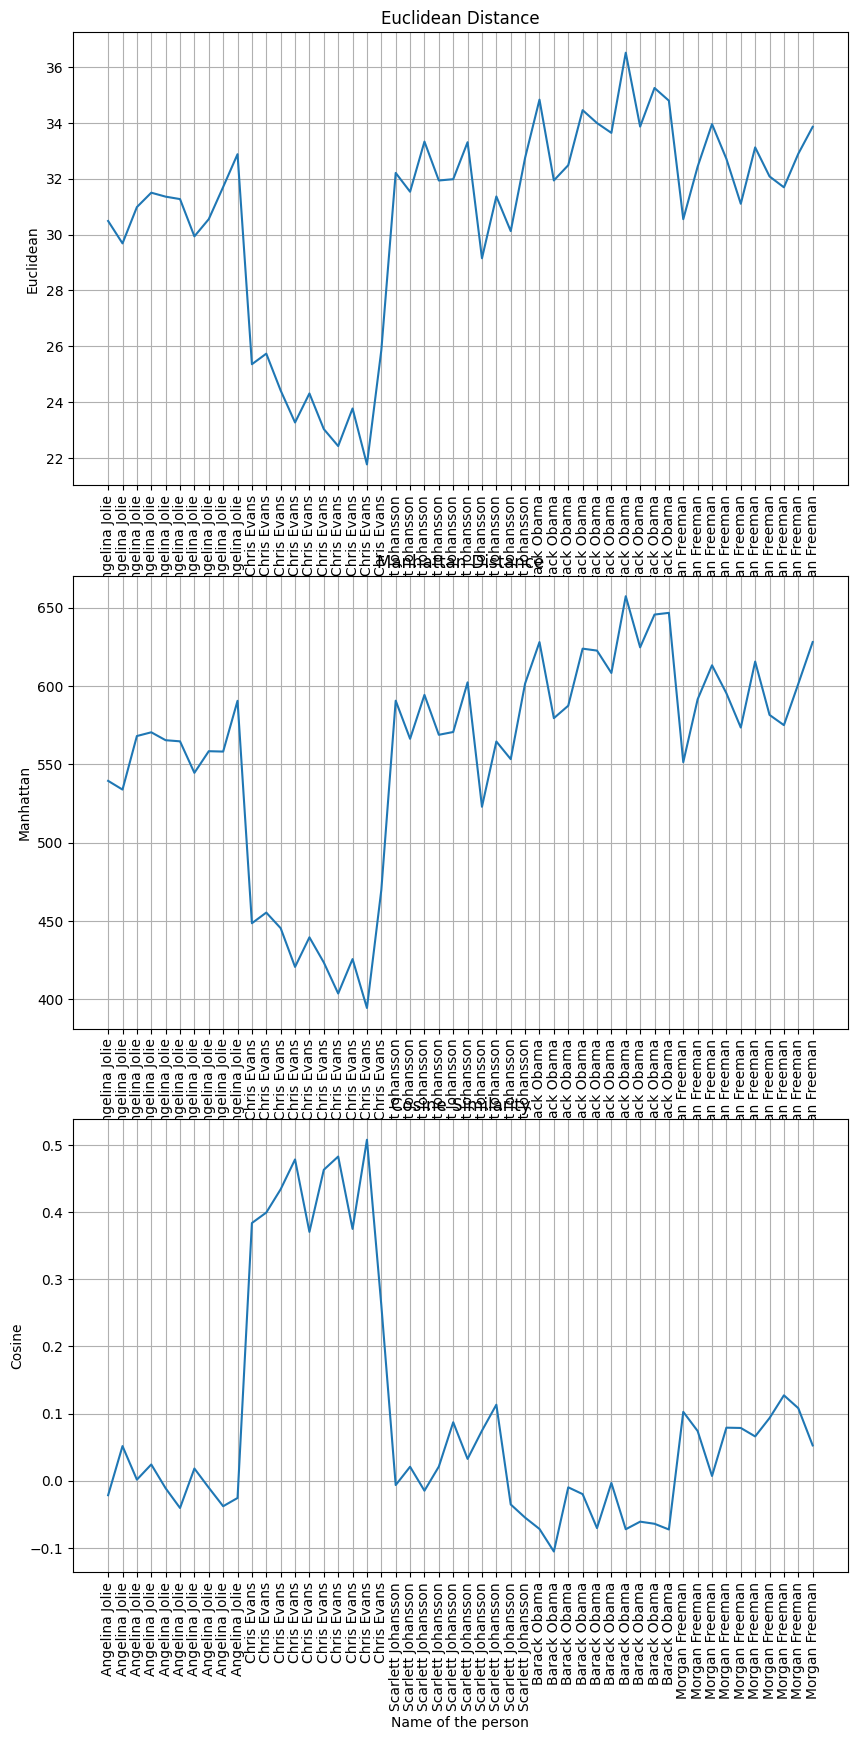

In [37]:
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
plt.plot(data_search['euclidean' ],)
plt.xticks(ticks=list(range(len(data_search['euclidean']))),
labels=data_search['Name' ],rotation=90)
plt.xlabel('Name of the person' )
plt.ylabel('Euclidean' )
plt.title('Euclidean Distance')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan' ],)
plt.xticks(ticks=list(range(len(data_search['manhattan']))),
labels=data_search['Name' ],rotation=90)
plt.xlabel('Name of the person' )
plt.ylabel('Manhattan' )
plt.title('Manhattan Distance')
plt.grid()

plt.subplot(3,1,3)
plt.plot(data_search['cosine' ],)
plt.xticks(ticks=list(range(len(data_search['cosine']))),
labels=data_search['Name' ],rotation=90)
plt.xlabel('Name of the person' )
plt.ylabel('Cosine' )
plt.title('Cosine Similarity')
plt.grid()

plt.show()

In [43]:
d_eu_optimal = 25

In [44]:
datafilter = data_search.query(f'euclidean < {d_eu_optimal}')
datafilter.reset_index(drop = True, inplace = True)

if len(datafilter) > 0:
    argmin = datafilter['euclidean'].argmin()
    name , role = datafilter. loc[argmin][['Name','Role']]

else:
    name = 'Unknown'
    role = 'Unknown'

In [45]:
print(name, role)

Chris Evans Student


In [49]:
d_man_optimal = 450

In [50]:
datafilter = data_search.query(f'manhattan < {d_man_optimal}')
datafilter.reset_index(drop = True, inplace = True)

if len(datafilter) > 0:
    argmin = datafilter['manhattan'].argmin()
    name , role = datafilter. loc[argmin][['Name','Role']]

else:
    name = 'Unknown'
    role = 'Unknown'

In [51]:
print(name, role)

Chris Evans Student


In [53]:
s_cos_optimal = 0.5

In [54]:
datafilter = data_search.query(f'cosine > {s_cos_optimal}')
datafilter.reset_index(drop = True, inplace = True)

if len(datafilter) > 0:
    argmin = datafilter['cosine'].argmax()
    name , role = datafilter. loc[argmin][['Name','Role']]

else:
    name = 'Unknown'
    role = 'Unknown'

In [55]:
print(name, role)

Chris Evans Student


In [56]:
datafilter

,Name,Role,Facial_Features,euclidean,manhattan,cosine
0,Chris Evans,Student,"[0.59088683, -1.4150568, -0.6726387, -1.310895...",21.763391,394.471029,0.507622


In [63]:
def ml_search_algorithm(dataframe, feature_column, test_vector, name_role=['Name','Role' ],thresh=0.5):
    '''
    cosine similarity base search algorithm
    '''
    # step-1: take the dataframe (collection of data)
    dataframe = dataframe.copy()
    # step-2: Index face embeding from the dataframe and convert into array
    X_list = dataframe[feature_column].tolist()
    X = np.asarray(X_list)
    
    # step-3: Cal. cosine similarity
    similar = pairwise.cosine_similarity(X, test_vector.reshape(1,-1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine' ] = similar_arr
    
    # step-4: filter the data
    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        # step-5: get the person name
        data_filter.reset_index(drop=True,inplace=True)
        argmax = data_filter['cosine' ].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role]
    
    else:
        person_name = 'Unknown'
        person_role = 'Unknown'
    
    return person_name, person_role

In [59]:
test_image = cv2.imread('test_images/test_obama.jpg')
cv2.imshow('test image', test_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [65]:
# step-1: take the test image and apply to insight face
results = faceapp.get(test_image)
test_copy = test_image.copy()
# step-2: use for loop and extract each embedding and pass to ml_search_algorithm

for res in results:
    x1, y1,x2,y2=res['bbox'].astype(int)
    embeddings = res['embedding' ]
    person_name, person_role = ml_search_algorithm(dataframe,
                                                    'Facial_Features',
                                                    test_vector=embeddings,
                                                    name_role=['Name','Role' ],
                                                    thresh=0.5)
                                                    
    if person_name == 'Unknown':
        color =(0,0,255) # bgr
    else:
        color = (0,255,0)
    
    cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)
    
    text_gen = person_name
    cv2.putText(test_copy,text_gen,(x1,y1),cv2.FONT_HERSHEY_DUPLEX,0.7,color,2)

cv2.imshow('test image', test_copy)
cv2.waitKey()
cv2.destroyAllWindows()

In [66]:
dataframe_compress = dataframe.groupby(by=['Name','Role' ]).mean()
dataframe_compress.reset_index(inplace=True)
dataframe_compress

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.4324205, 1.0748497, -0.128624, -1.8332914, ..."
1,Barack Obama,Teacher,"[0.9485806, -0.5584053, 0.094820514, -1.279659..."
2,Chris Evans,Student,"[0.72017133, -1.468415, -0.7781255, -1.4601074..."
3,Morgan Freeman,Teacher,"[0.4853508, -0.61925495, -0.4069931, 1.0687788..."
4,Scarlett Johansson,Student,"[0.19131932, -0.4884374, -1.6902335, 0.4423968..."


In [67]:
xvalues = dataframe_compress.values

In [68]:
col_name = np.array(dataframe_compress.columns)
col_name

array(['Name', 'Role', 'Facial_Features'], dtype=object)

In [69]:
np.savez('dataframe_students_teacher.npz',xvalues, col_name)

In [70]:
# Load the numpy zip
file_np = np.load('dataframe_students_teacher.npz', allow_pickle=True)
file_np.files


['arr_0', 'arr_1']

In [71]:
pd.DataFrame(file_np['arr_0'],columns=file_np['arr_1'])

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.4324205, 1.0748497, -0.128624, -1.8332914, ..."
1,Barack Obama,Teacher,"[0.9485806, -0.5584053, 0.094820514, -1.279659..."
2,Chris Evans,Student,"[0.72017133, -1.468415, -0.7781255, -1.4601074..."
3,Morgan Freeman,Teacher,"[0.4853508, -0.61925495, -0.4069931, 1.0687788..."
4,Scarlett Johansson,Student,"[0.19131932, -0.4884374, -1.6902335, 0.4423968..."
